<a href="https://colab.research.google.com/github/MehrdadJalali-AI/Statistics-and-Machine-Learning/blob/main/Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Generate Data from Different Distributions**

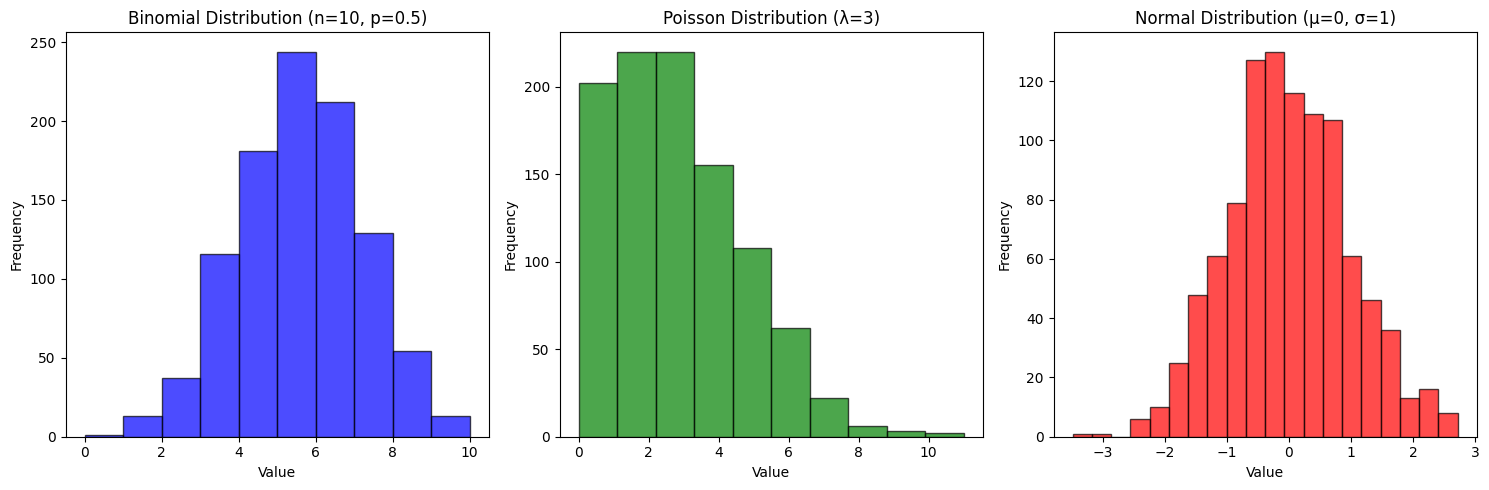

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generating data
binomial_data = np.random.binomial(n=10, p=0.5, size=1000)
poisson_data = np.random.poisson(lam=3, size=1000)
normal_data = np.random.normal(loc=0, scale=1, size=1000)

# Plotting the distributions
plt.figure(figsize=(15, 5))

# Binomial distribution
plt.subplot(1, 3, 1)
plt.hist(binomial_data, bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.title('Binomial Distribution (n=10, p=0.5)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Poisson distribution
plt.subplot(1, 3, 2)
plt.hist(poisson_data, bins=10, color='green', alpha=0.7, edgecolor='black')
plt.title('Poisson Distribution (λ=3)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Normal distribution
plt.subplot(1, 3, 3)
plt.hist(normal_data, bins=20, color='red', alpha=0.7, edgecolor='black')
plt.title('Normal Distribution (μ=0, σ=1)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()



**Explore the Central Limit Theorem Through Sampling**

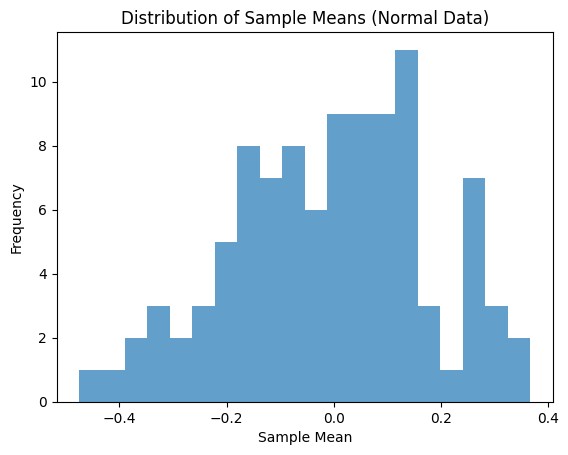

In [4]:
def sample_means(data, sample_size, num_samples):
    means = []
    for _ in range(num_samples):
        sample = np.random.choice(data, size=sample_size, replace=True)
        means.append(np.mean(sample))
    return means

# Taking 100 samples of size 30 from normal data
sample_means_normal = sample_means(normal_data, 30, 100)

# Plotting the distribution of sample means
plt.hist(sample_means_normal, bins=20, alpha=0.7)
plt.title('Distribution of Sample Means (Normal Data)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()


**Visualize Distribution Characteristics and Sample Means**

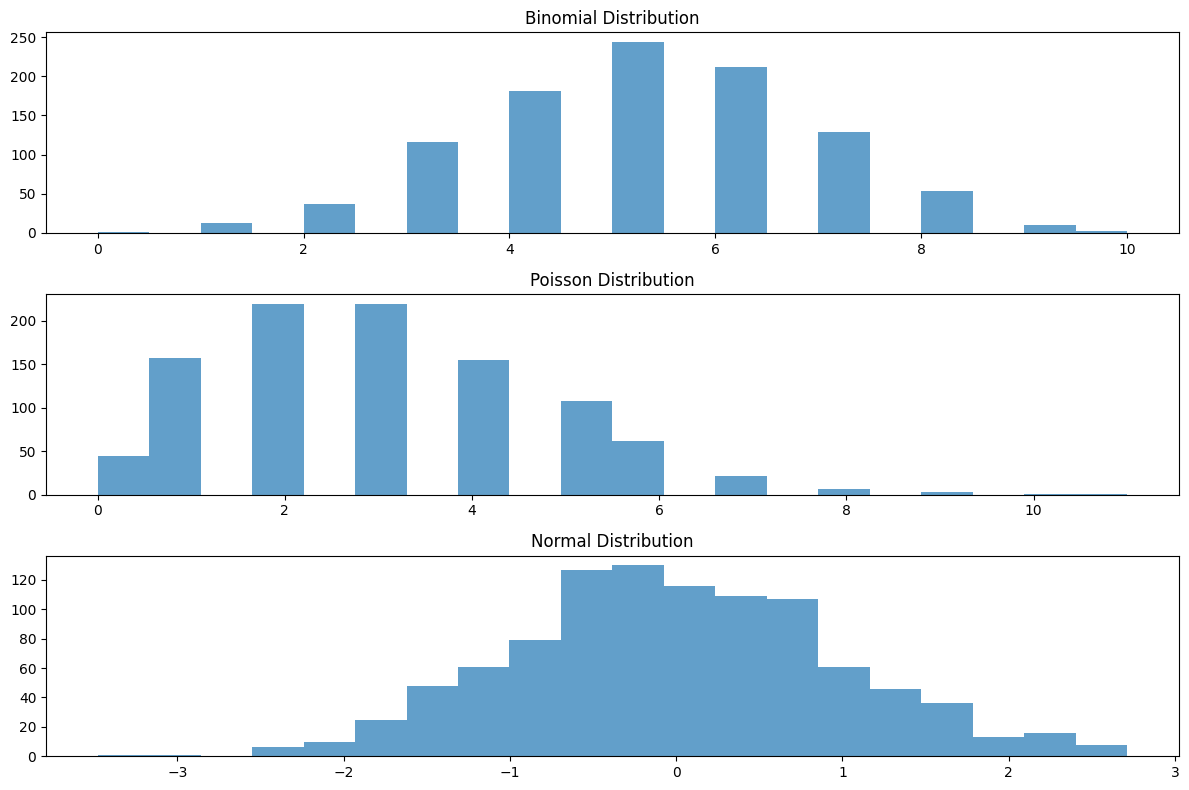

In [5]:
# Visualizing initial distributions
plt.figure(figsize=(12, 8))
plt.subplot(311)
plt.hist(binomial_data, bins=20, alpha=0.7)
plt.title('Binomial Distribution')
plt.subplot(312)
plt.hist(poisson_data, bins=20, alpha=0.7)
plt.title('Poisson Distribution')
plt.subplot(313)
plt.hist(normal_data, bins=20, alpha=0.7)
plt.title('Normal Distribution')
plt.tight_layout()
plt.show()


**Implementing Different Sampling Methods**

In [6]:
import numpy as np
import pandas as pd

# Creating a dataset
data = pd.DataFrame({
    'value': np.random.randint(0, 100, size=1000),
    'group': np.random.choice(['A', 'B', 'C', 'D'], size=1000)
})

# Random Sampling
random_sample = data.sample(n=100)

# Systematic Sampling
# The slicing notation ::step means "select rows at intervals of step". For example:
# step = 100: Selects rows with indices 0, 100, 200, 300, and so on.
step = len(data) // 100
systematic_sample = data.iloc[::step]

# Stratified Sampling
stratified_sample = data.groupby('group', group_keys=False).apply(lambda x: x.sample(min(len(x), 25)))

# Cluster Sampling
clusters = data['group'].unique()
selected_clusters = np.random.choice(clusters, 2, replace=False)
cluster_sample = data[data['group'].isin(selected_clusters)]

print("Random Sample:\n", random_sample.head())
print("Systematic Sample:\n", systematic_sample.head())
print("Stratified Sample:\n", stratified_sample.head())
print("Cluster Sample:\n", cluster_sample.head())


Random Sample:
      value group
817     61     D
383     80     B
480     78     A
864     21     D
151     61     A
Systematic Sample:
     value group
0      41     D
10     79     B
20     50     A
30     72     C
40     69     D
Stratified Sample:
      value group
299     60     A
694     76     A
158     82     A
600     27     A
35      64     A
Cluster Sample:
     value group
2      56     A
4      15     C
7      71     C
9      28     C
12     32     A


<ipython-input-6-473c395268d4>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = data.groupby('group', group_keys=False).apply(lambda x: x.sample(min(len(x), 25)))


**The Effect of Sample Size and Independence on CLT Assumptions**

{10: [51.6, 52.0, 62.9, 45.3, 55.1, 63.5, 40.4, 37.3, 29.2, 50.3, 59.6, 50.0, 38.1, 68.8, 46.5, 41.7, 59.1, 54.7, 41.8, 63.7, 70.7, 51.6, 70.0, 51.1, 42.9, 48.4, 47.9, 52.3, 43.7, 42.3, 44.6, 38.8, 46.0, 52.5, 48.9, 49.2, 43.7, 56.7, 66.5, 51.0, 63.5, 41.1, 55.5, 49.7, 62.0, 38.8, 48.0, 46.0, 62.5, 65.6, 36.8, 63.7, 53.0, 39.7, 50.2, 53.3, 49.2, 49.8, 45.7, 52.0, 63.2, 42.7, 69.6, 65.2, 62.1, 48.2, 44.0, 50.2, 60.9, 50.4, 57.8, 41.7, 42.1, 44.0, 56.5, 40.6, 49.4, 39.8, 33.6, 30.1, 62.3, 62.7, 59.7, 64.6, 59.7, 61.4, 30.1, 44.8, 58.3, 54.7, 53.4, 60.6, 56.3, 50.6, 58.2, 42.7, 45.2, 48.8, 63.3, 40.8, 36.6, 52.4, 54.5, 40.7, 67.7, 49.4, 33.3, 49.7, 48.0, 60.8, 53.5, 41.4, 47.4, 56.5, 57.5, 51.5, 38.3, 45.3, 42.8, 40.2, 46.0, 54.0, 50.0, 59.6, 53.9, 76.4, 56.5, 30.6, 47.0, 51.2, 57.6, 63.1, 46.5, 38.2, 57.8, 61.0, 46.7, 44.6, 46.2, 47.5, 41.1, 40.6, 55.6, 48.0, 58.0, 48.2, 58.2, 65.2, 63.4, 58.2, 48.3, 46.2, 52.2, 39.5, 46.4, 59.8, 64.1, 48.8, 36.0, 47.4, 31.8, 52.5, 48.6, 33.6, 55.1, 56.1

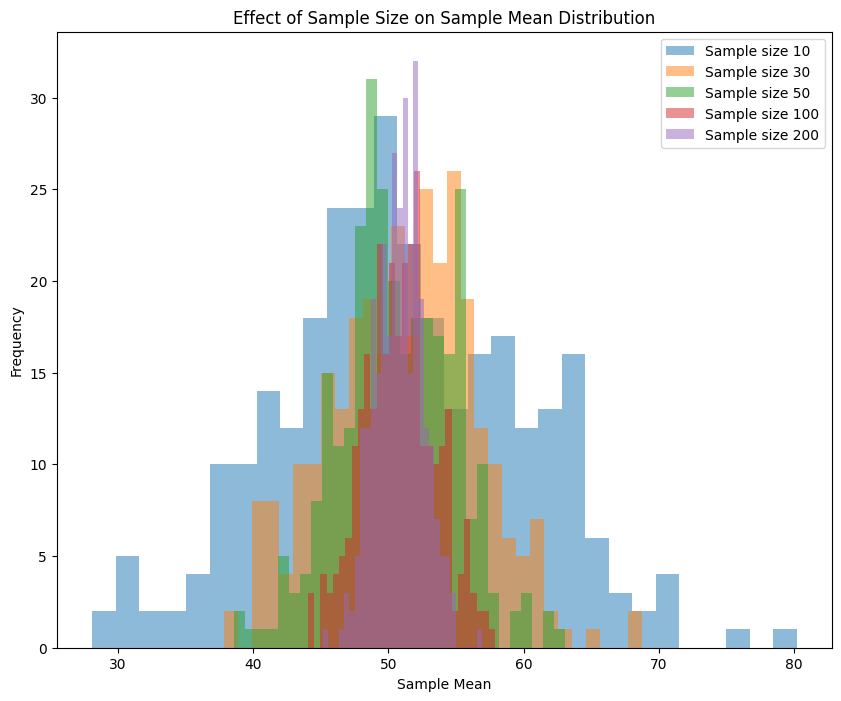

In [ ]:
import matplotlib.pyplot as plt

# This line defines a list of different sample sizes that will be used to demonstrate how the distribution of sample means changes with different sample sizes.
sample_sizes = [10, 30, 50, 100, 200]
sample_means = {size: [data['value'].sample(size).mean() for _ in range(300)] for size in sample_sizes}
print (sample_means)
# Plotting the results
plt.figure(figsize=(10, 8))
for size, means in sample_means.items():
    plt.hist(means, alpha=0.5, bins=30, label=f'Sample size {size}')
plt.legend()
plt.title('Effect of Sample Size on Sample Mean Distribution')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()


       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

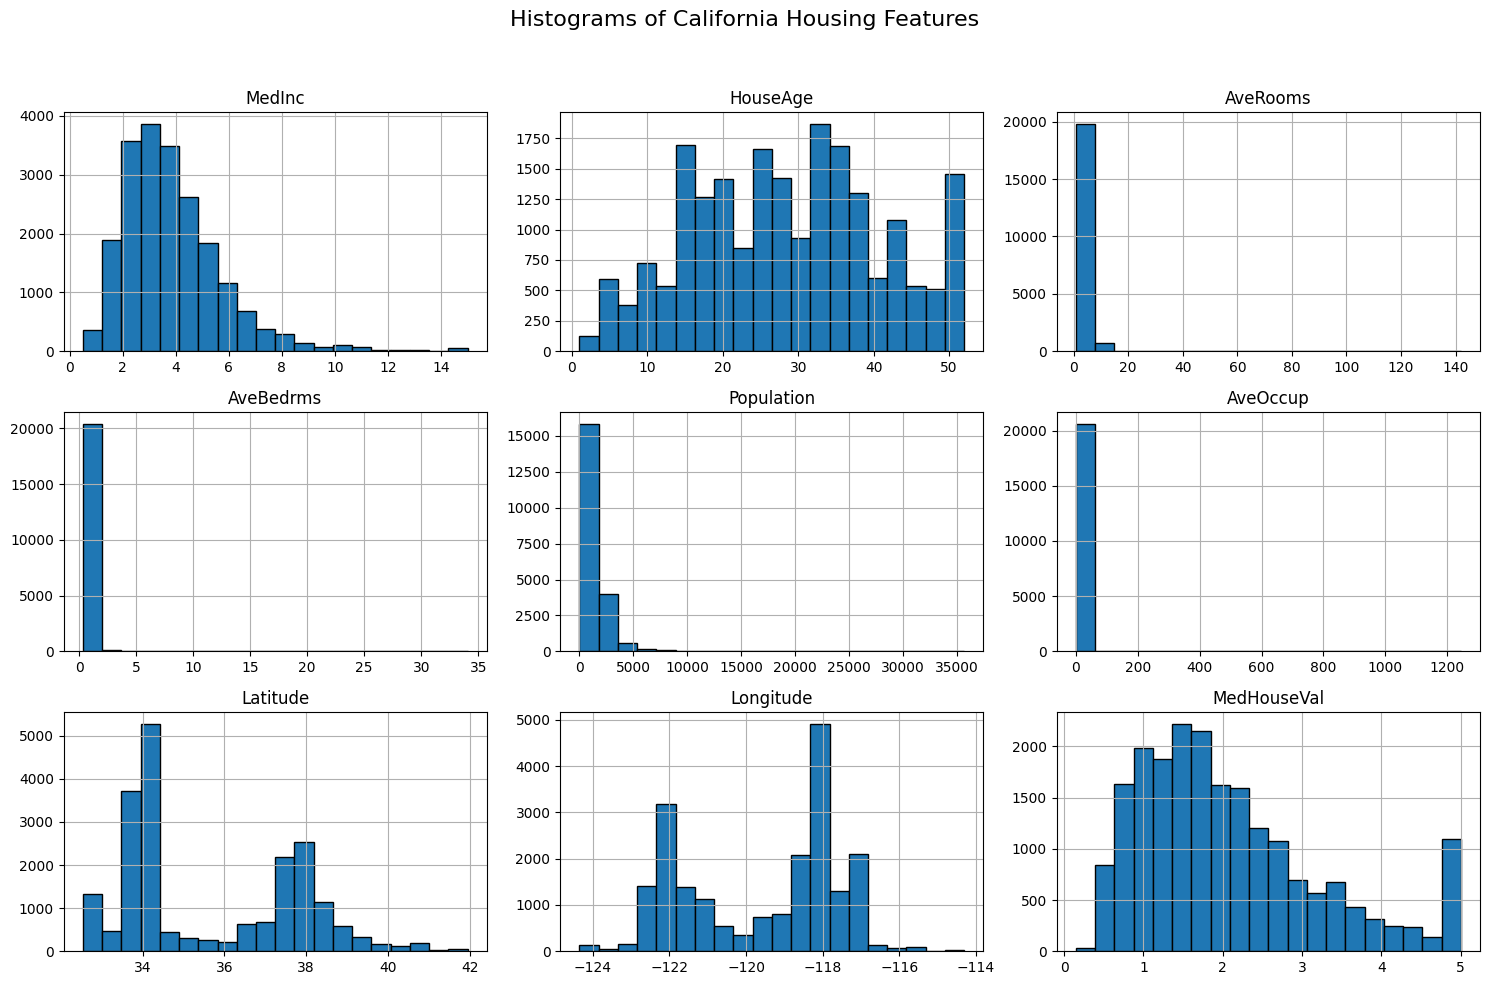

In [9]:
# Load necessary libraries
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt

# Load the California housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

print(df)

# Plot histograms of all features
df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of California Housing Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

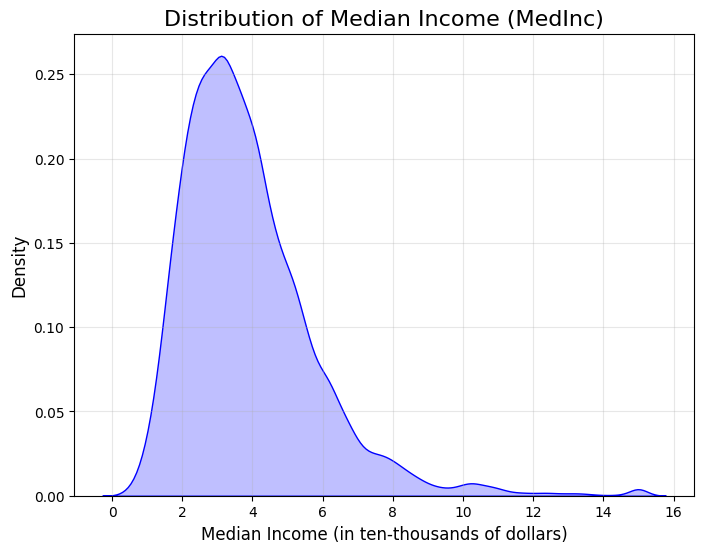

In [15]:
import seaborn as sns
plt.figure(figsize=(8, 6))

#The kdeplot function in the Seaborn library is used to plot the Kernel Density Estimate (KDE) of a dataset, which represents a smooth estimate of the data's probability density function (PDF).
sns.kdeplot(df['MedInc'], fill=True, color="blue")  # Replace 'shade' with 'fill'
plt.title('Distribution of Median Income (MedInc)', fontsize=16)
plt.xlabel('Median Income (in ten-thousands of dollars)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

In [17]:
from scipy.stats import skew
# Calculate skewness for the 'MedInc' feature
medinc_skewness = skew(df['MedInc'])
print(f"Skewness of Median Income (MedInc): {medinc_skewness:.4f}")

Skewness of Median Income (MedInc): 1.6465


In [19]:
# Random Sampling
random_sample = df.sample(n=100)  # Randomly select 100 rows
print (random_sample)


       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
8901   4.3158      49.0  5.478261   1.073913      1435.0  2.079710     34.04   
3035   4.4125      12.0  6.864407   1.140436      1399.0  3.387409     35.41   
16560  4.1298      19.0  5.774336   1.048673      1290.0  2.853982     37.77   
15871  2.6667      52.0  4.680000   1.080000       308.0  4.106667     37.76   
8571   7.8924      37.0  6.554667   1.066667       920.0  2.453333     33.90   
...       ...       ...       ...        ...         ...       ...       ...   
17469  6.0256      28.0  5.942761   1.013468      1173.0  3.949495     34.44   
4152   2.5139      52.0  3.603878   1.077562      1189.0  3.293629     34.12   
5035   2.9643      48.0  5.548628   1.079800      1170.0  2.917706     33.99   
18896  4.0114      42.0  6.687243   1.049383       578.0  2.378601     38.12   
7643   4.3687      33.0  4.851064   1.024316      1650.0  5.015198     33.82   

       Longitude  MedHouseVal  
8901   

In [22]:
# Stratified Sampling
stratified_sample = df.groupby('MedInc', group_keys=False).apply(lambda x: x.sample(min(len(x), 10)))
stratified_sample


<ipython-input-22-7fe333e703e8>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = df.groupby('MedInc', group_keys=False).apply(lambda x: x.sample(min(len(x), 10)))


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
4861,0.4999,29.0,2.373272,1.055300,2690.0,12.396313,34.02,-118.28,5.00001
6688,0.4999,28.0,7.677419,1.870968,142.0,4.580645,34.15,-118.08,5.00001
7125,0.4999,36.0,2.500000,0.833333,15.0,2.500000,33.90,-118.04,1.62500
3249,0.4999,23.0,6.054545,1.672727,198.0,3.600000,36.09,-119.99,1.00000
3258,0.4999,16.0,21.631579,6.000000,26.0,1.368421,39.42,-122.89,0.73500
...,...,...,...,...,...,...,...,...,...
8853,15.0001,52.0,9.867036,1.091413,1163.0,3.221607,34.07,-118.41,5.00001
16171,15.0001,52.0,8.000000,1.000000,13.0,13.000000,37.79,-122.50,5.00001
17858,15.0001,43.0,5.687500,0.750000,58.0,3.625000,37.46,-121.87,5.00001
18501,15.0001,52.0,8.461538,1.230769,55.0,2.115385,37.19,-121.59,1.31300


from matplotlib import pyplot as plt
stratified_sample['MedInc'].plot(kind='hist', bins=20, title='MedInc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
stratified_sample['HouseAge'].plot(kind='hist', bins=20, title='HouseAge')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
stratified_sample['AveRooms'].plot(kind='hist', bins=20, title='AveRooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
stratified_sample['AveBedrms'].plot(kind='hist', bins=20, title='AveBedrms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
stratified_sample.plot(kind='scatter', x='MedInc', y='HouseAge', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
stratified_sample.plot(kind='scatter', x='HouseAge', y='AveRooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
stratified_sample.plot(kind='scatter', x='AveRooms', y='AveBedrms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
stratified_sample.plot(kind='scatter', x='AveBedrms', y='Population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MedInc']
  ys = series['HouseAge']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = stratified_sample.sort_values('MedInc', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MedInc')
_ = plt.ylabel('HouseAge')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MedInc']
  ys = series['AveRooms']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = stratified_sample.sort_values('MedInc', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MedInc')
_ = plt.ylabel('AveRooms')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MedInc']
  ys = series['AveBedrms']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = stratified_sample.sort_values('MedInc', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MedInc')
_ = plt.ylabel('AveBedrms')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MedInc']
  ys = series['Population']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = stratified_sample.sort_values('MedInc', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MedInc')
_ = plt.ylabel('Population')

from matplotlib import pyplot as plt
stratified_sample['MedInc'].plot(kind='line', figsize=(8, 4), title='MedInc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
stratified_sample['HouseAge'].plot(kind='line', figsize=(8, 4), title='HouseAge')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
stratified_sample['AveRooms'].plot(kind='line', figsize=(8, 4), title='AveRooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
stratified_sample['AveBedrms'].plot(kind='line', figsize=(8, 4), title='AveBedrms')
plt.gca().spines[['top', 'right']].set_visible(False)

In [23]:
# Systematic Sampling
step = len(df) // 100  # Interval for systematic sampling
systematic_sample = df.iloc[::step]  # Select every 'step'-th row
systematic_sample

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
206,2.2930,49.0,5.365297,0.990868,859.0,3.922374,37.79,-122.23,1.063
412,4.5893,52.0,6.273713,1.105691,835.0,2.262873,37.89,-122.28,2.901
618,2.8355,45.0,5.105978,1.112772,1573.0,2.137228,37.73,-122.15,2.454
824,4.0326,34.0,5.222581,0.945161,1148.0,3.703226,37.63,-122.08,1.647
...,...,...,...,...,...,...,...,...,...
19776,1.8375,21.0,5.372671,1.086957,982.0,3.049689,39.86,-122.23,0.798
19982,1.4792,22.0,4.153117,0.983740,2165.0,2.933604,36.21,-119.34,0.544
20188,6.0661,24.0,6.329787,0.981763,2194.0,3.334347,34.27,-119.17,2.348
20394,6.2423,14.0,7.161290,1.039171,1566.0,3.608295,34.22,-118.87,3.054


from matplotlib import pyplot as plt
systematic_sample['MedInc'].plot(kind='hist', bins=20, title='MedInc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
systematic_sample['HouseAge'].plot(kind='hist', bins=20, title='HouseAge')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
systematic_sample['AveRooms'].plot(kind='hist', bins=20, title='AveRooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
systematic_sample['AveBedrms'].plot(kind='hist', bins=20, title='AveBedrms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
systematic_sample.plot(kind='scatter', x='MedInc', y='HouseAge', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
systematic_sample.plot(kind='scatter', x='HouseAge', y='AveRooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
systematic_sample.plot(kind='scatter', x='AveRooms', y='AveBedrms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
systematic_sample.plot(kind='scatter', x='AveBedrms', y='Population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
systematic_sample['MedInc'].plot(kind='line', figsize=(8, 4), title='MedInc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
systematic_sample['HouseAge'].plot(kind='line', figsize=(8, 4), title='HouseAge')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
systematic_sample['AveRooms'].plot(kind='line', figsize=(8, 4), title='AveRooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
systematic_sample['AveBedrms'].plot(kind='line', figsize=(8, 4), title='AveBedrms')
plt.gca().spines[['top', 'right']].set_visible(False)

In [25]:
# Cluster Sampling
df['Cluster'] = pd.cut(df['Longitude'], bins=5, labels=False)  # Create clusters based on 'Longitude'
cluster_id = df['Cluster'].sample(1).iloc[0]  # Randomly select one cluster
cluster_sample = df[df['Cluster'] == cluster_id]  # Select all rows from the chosen cluster
cluster_sample


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Cluster
2783,2.1212,16.0,5.330532,1.112045,1501.0,2.102241,37.35,-118.18,1.083,3
2793,2.7500,22.0,5.471698,1.058176,1541.0,2.422956,37.17,-118.30,0.945,3
2794,1.7292,19.0,4.500000,1.181818,51.0,2.318182,36.95,-117.90,1.375,3
2795,2.3250,35.0,6.908356,1.428571,861.0,2.320755,36.94,-118.31,0.806,3
2796,2.0357,34.0,4.906103,1.122066,896.0,2.103286,36.64,-118.05,0.742,3
...,...,...,...,...,...,...,...,...,...,...
15609,6.4745,8.0,8.052174,1.085217,2048.0,3.561739,32.73,-116.91,3.003,3
15610,5.7652,13.0,6.497018,0.976143,1431.0,2.844930,32.72,-116.87,2.599,3
15611,6.2578,9.0,7.325967,1.085635,1355.0,3.743094,32.67,-116.89,2.931,3
15612,4.7367,14.0,5.937500,1.091570,2129.0,3.094477,32.74,-116.76,2.145,3


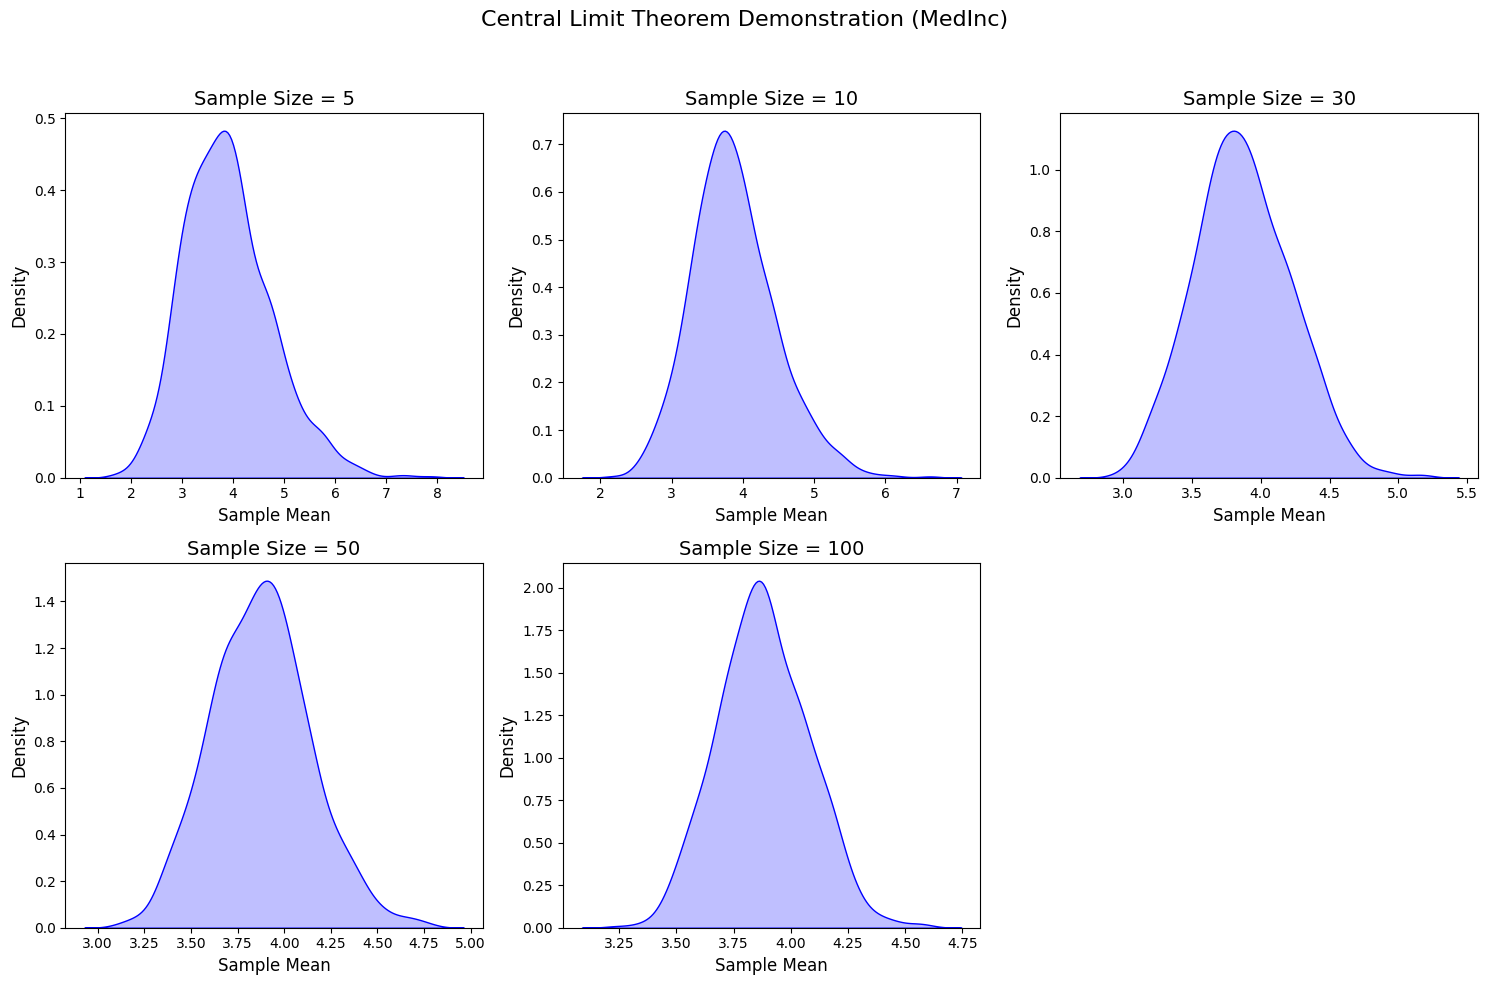

In [26]:
import numpy as np

# Central Limit Theorem demonstration
sample_sizes = [5, 10, 30, 50, 100]  # Different sample sizes
sample_means = {n: [df['MedInc'].sample(n).mean() for _ in range(1000)] for n in sample_sizes}

# Plotting the sample mean distributions
plt.figure(figsize=(15, 10))
for i, n in enumerate(sample_sizes, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(sample_means[n], fill=True, color="blue")
    plt.title(f'Sample Size = {n}', fontsize=14)
    plt.xlabel('Sample Mean', fontsize=12)
    plt.ylabel('Density', fontsize=12)
plt.suptitle('Central Limit Theorem Demonstration (MedInc)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
